## Pytorch classify MNIST digits example and experiment tracking with mlflow

In [1]:
! pip install mlflow

In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import mlflow

# run `mlflow ui` in terminal to view experiment results in browser

# set the experiment id
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment(experiment_id="196911809555992308")

input_size = 28*28
hidden_size = 100
output_size = 10
learning_rate = 0.001
batch_size = 100
epochs = 5

mlflow.log_param("input_size", input_size)
mlflow.log_param("hidden_size", hidden_size)
mlflow.log_param("output_size", output_size)
mlflow.log_param("learning_rate", learning_rate)
mlflow.log_param("batch_size", batch_size)
mlflow.log_param("epochs", epochs)

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

class NeurlNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeurlNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        return out

model = NeurlNet(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data.reshape(-1, input_size))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        mlflow.log_metric("train_loss", loss.item(), batch_idx * len(data))
        if batch_idx % 10 == 0:
            print(loss.item())

2.3285176753997803
1.8558696508407593
1.422301173210144
1.0251716375350952
0.7810633778572083
0.6411449909210205
0.5316434502601624
0.5332139134407043
0.5145103335380554
0.45978423953056335
0.4577609896659851
0.40239617228507996
0.478427529335022
0.38363879919052124
0.3925294876098633
0.3423437178134918
0.27364182472229004
0.2696789801120758
0.2968422472476959
0.4453583061695099
0.332331120967865
0.26632586121559143
0.2826595604419708
0.416752427816391
0.39672017097473145
0.33747413754463196
0.28218960762023926
0.3311726450920105
0.31964877247810364
0.35460251569747925
0.37991905212402344
0.22545114159584045
0.2777330279350281
0.194536954164505
0.38742294907569885
0.25648850202560425
0.3088597059249878
0.35331055521965027
0.2038506120443344
0.3374941647052765
0.17766518890857697
0.27880406379699707
0.2602766156196594
0.3042912781238556
0.18774497509002686
0.363298237323761
0.21801559627056122
0.17350877821445465
0.2214244306087494
0.20764867961406708
0.2316659539937973
0.23603561520576

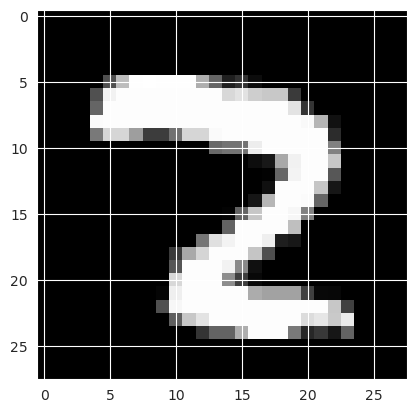

2


<Figure size 640x480 with 0 Axes>

In [3]:
plt.imshow(train_dataset[28][0].reshape(28, 28), cmap='gray')
plt.show()
plt.savefig("number_plot.png")
mlflow.log_artifact("number_plot.png")

print(train_dataset[28][1])


In [4]:
run = mlflow.active_run()
runId = run.info.run_id

# Train your model and obtain the trained model object
# Log the model to MLflow
mlflow.pytorch.log_model(
    pytorch_model=model,
    artifact_path=f"my-model{runId}",
    registered_model_name="my-registered-model"
)
# Save the model to a file
mlflow.pytorch.save_model(
    pytorch_model=model,
    path=f"my-model{runId}",
)

/home/michal/anaconda3/lib/python3.12/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
2025/01/20 11:55:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'my-registered-model' already exists. Creating a new version of this model...
2025/01/20 11:55:34 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: my-registered-model, version 9
Created version '9' of model 'my-registered-model'.


Accuracy: 0.9697
🏃 View run thoughtful-cow-382 at: http://localhost:5000/#/experiments/196911809555992308/runs/b7833e6f28984af0bdcb9b86f54bd7b8
🧪 View experiment at: http://localhost:5000/#/experiments/196911809555992308
1 1


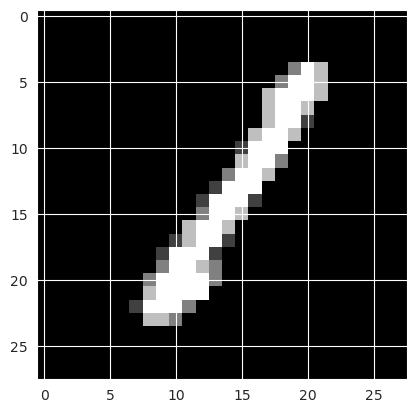

6 6


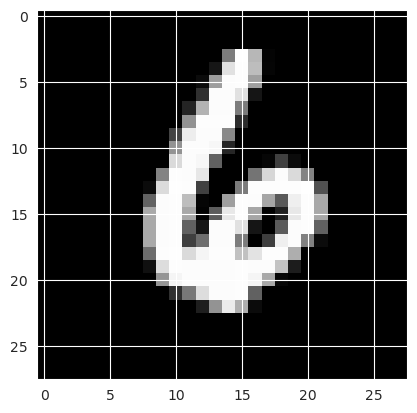

0 0


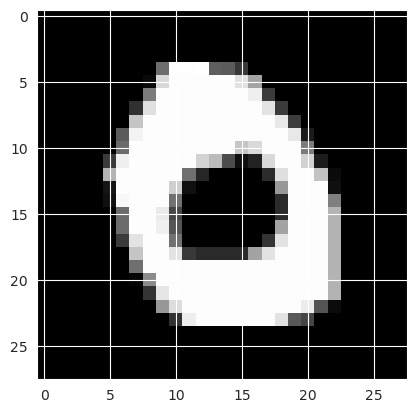

2 2


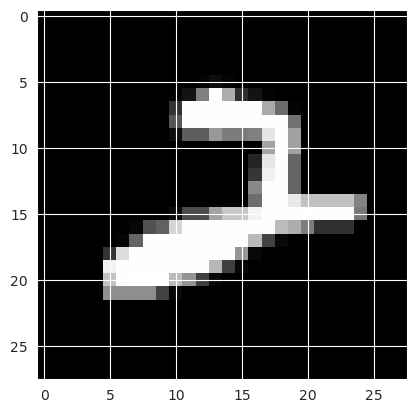

0 0


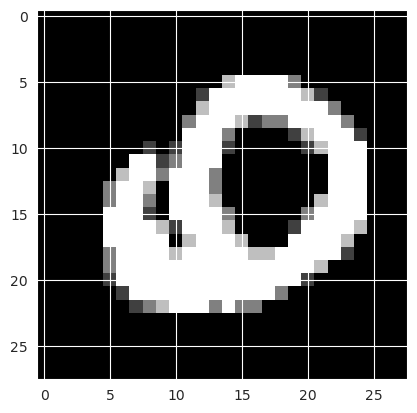

7 7


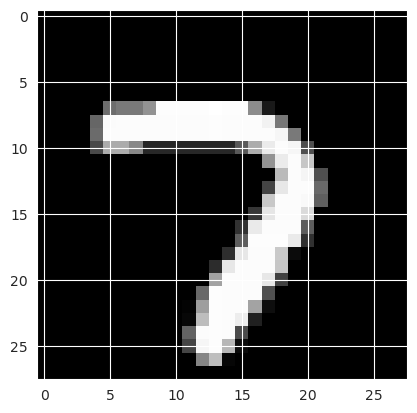

8 8


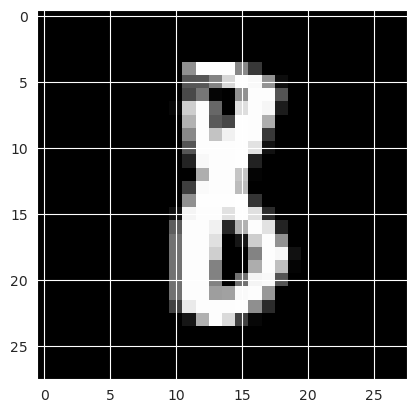

2 2


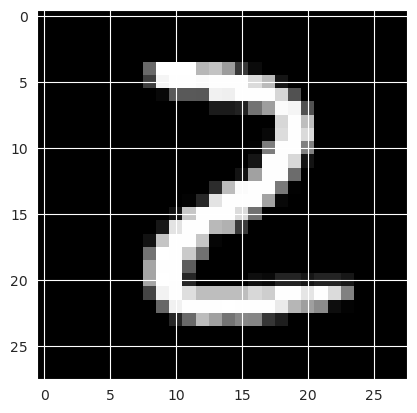

5 5


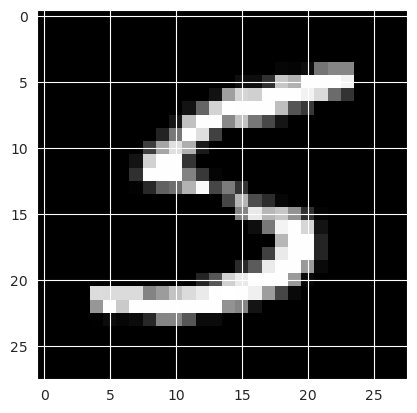

4 4


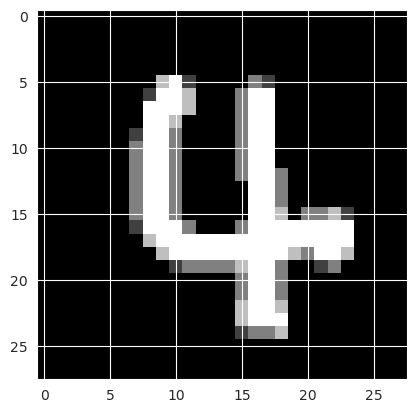

8 8


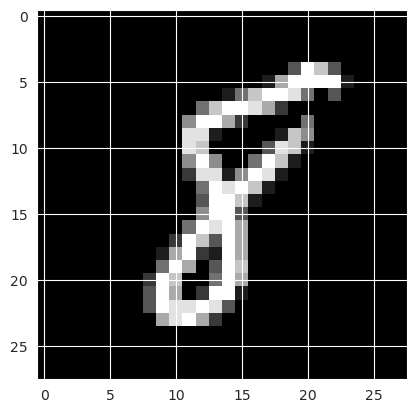

5 5


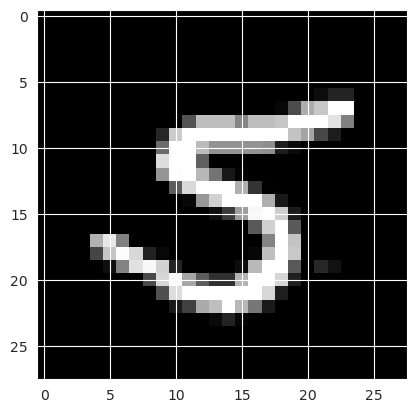

0 0


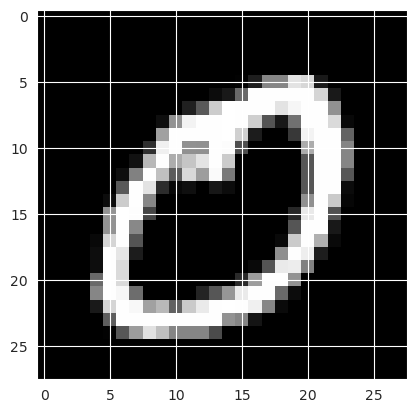

8 8


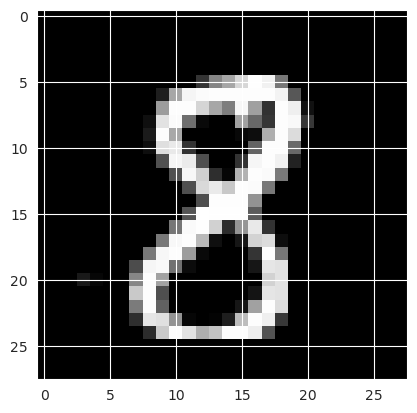

0 0


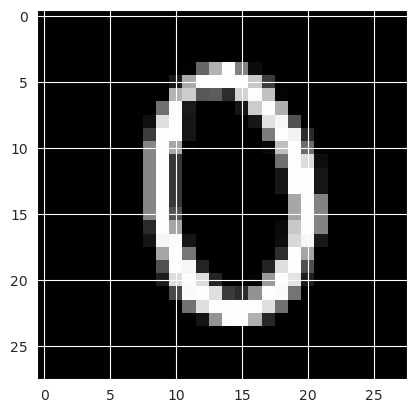

6 6


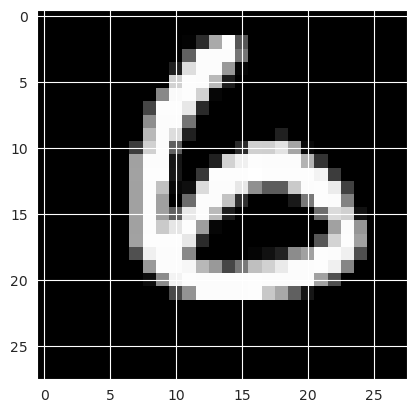

5 5


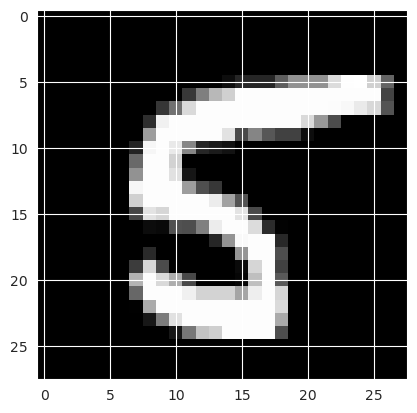

2 2


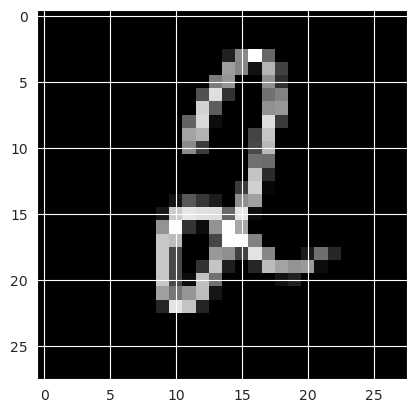

7 7


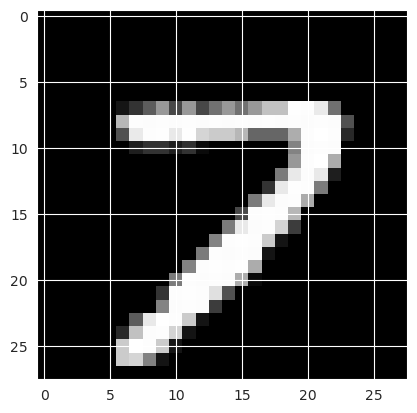

7 7


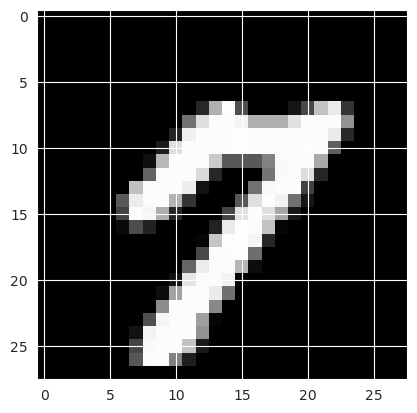

1 1


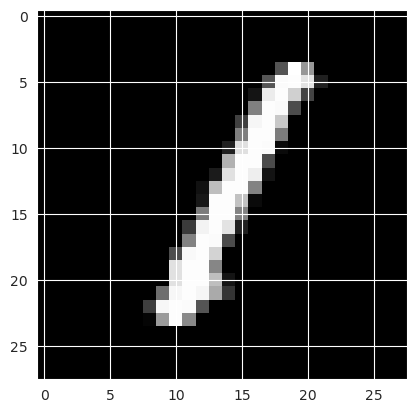

7 7


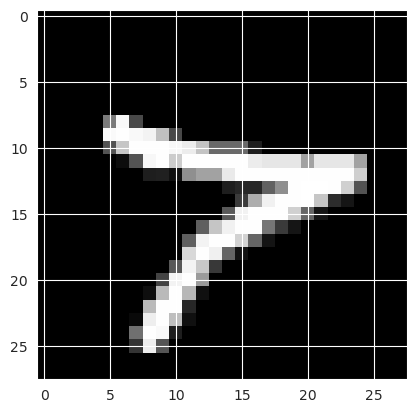

7 7


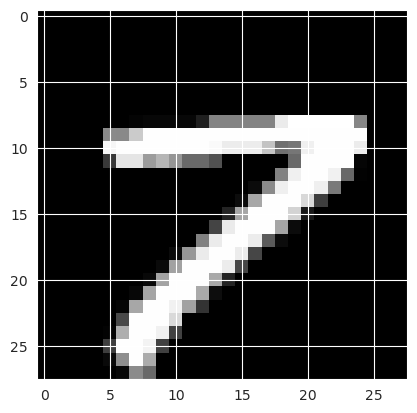

8 8


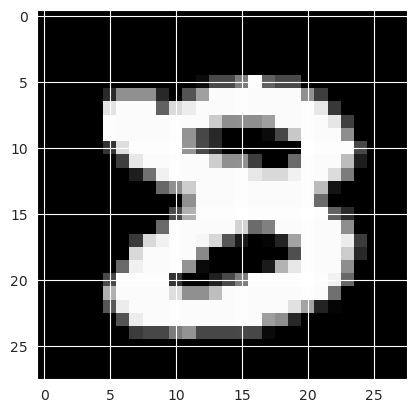

3 3


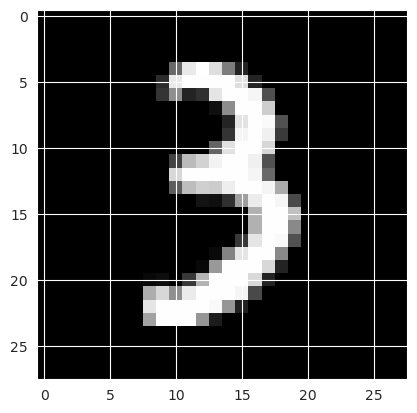

5 5


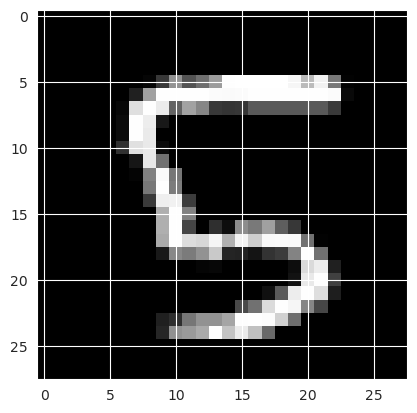

6 6


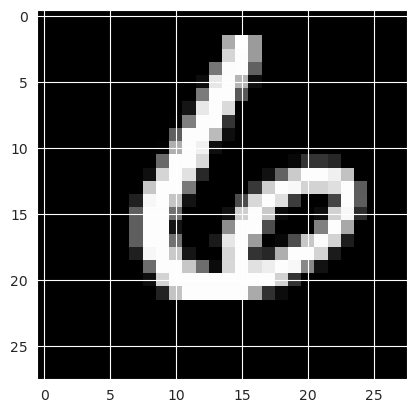

2 2


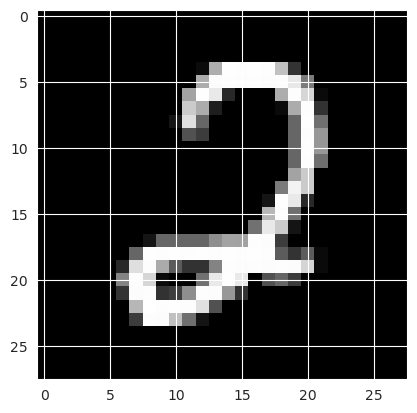

4 4


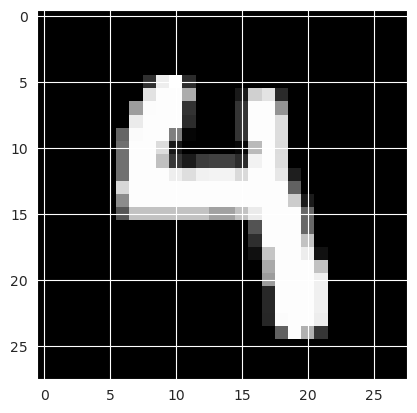

1 1


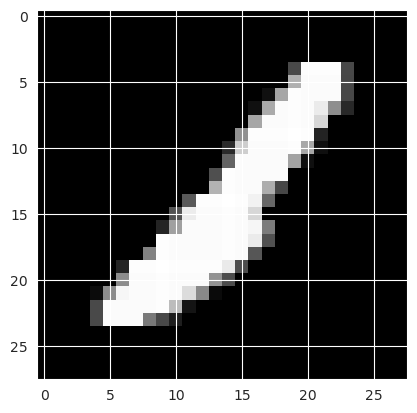

1 1


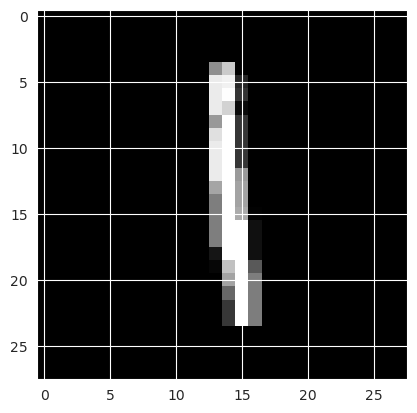

8 8


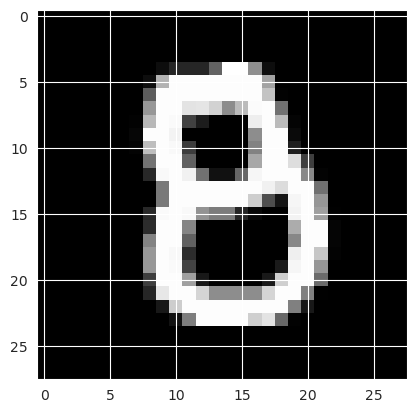

5 5


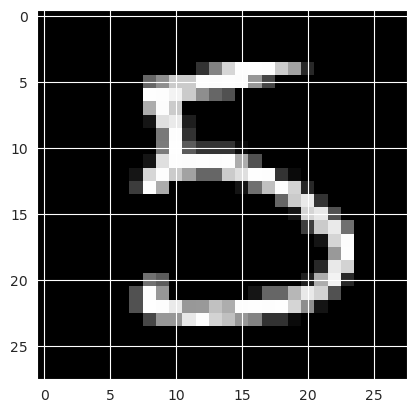

0 0


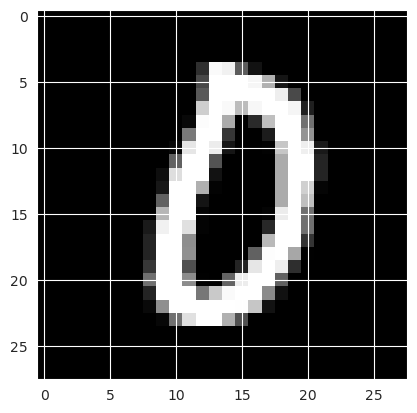

6 6


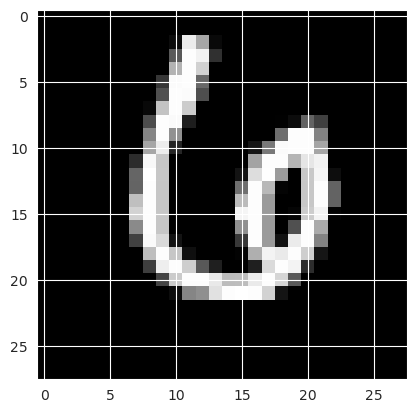

8 8


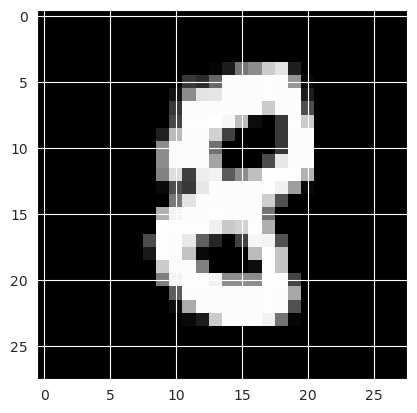

6 6


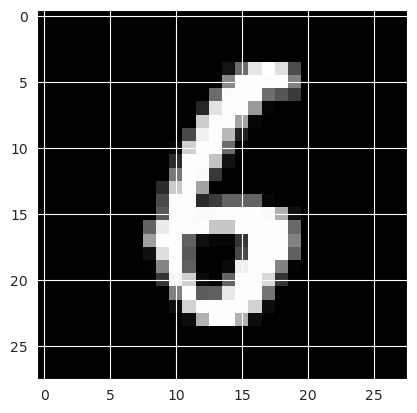

7 7


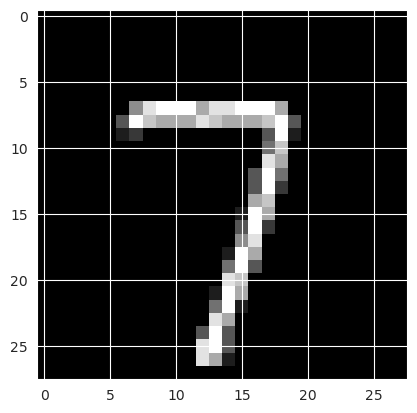

1 1


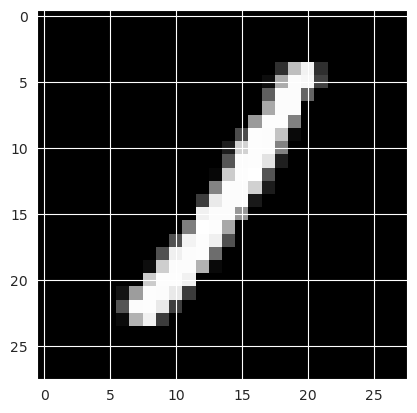

5 5


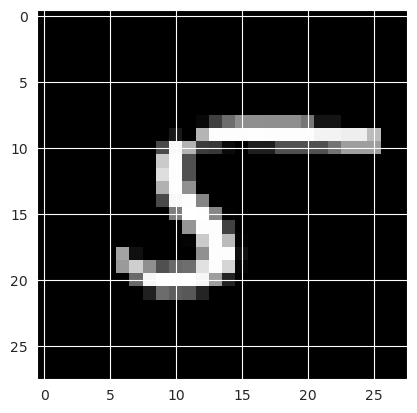

5 5


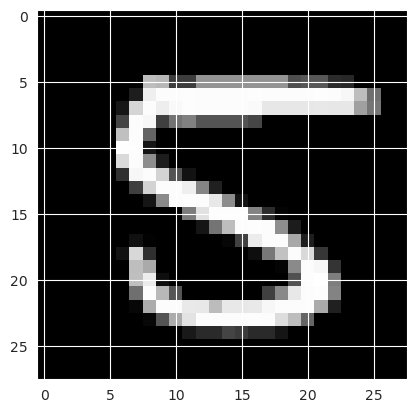

7 7


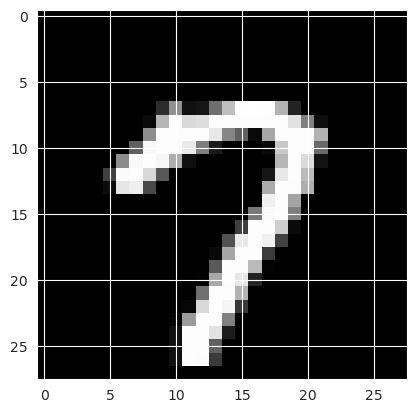

0 0


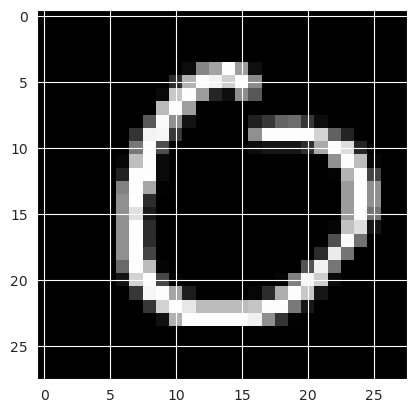

8 4


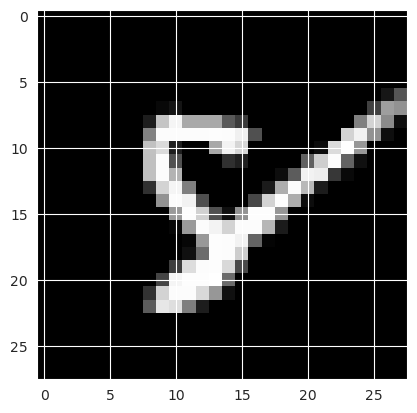

5 5


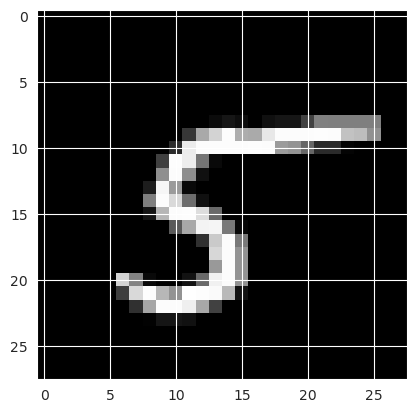

5 5


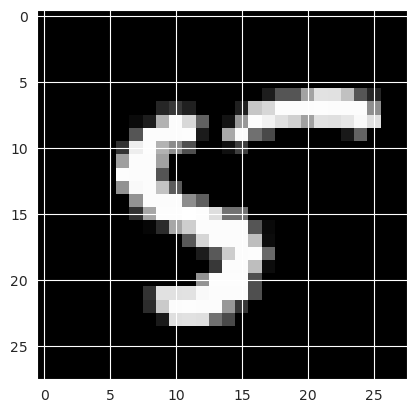

1 1


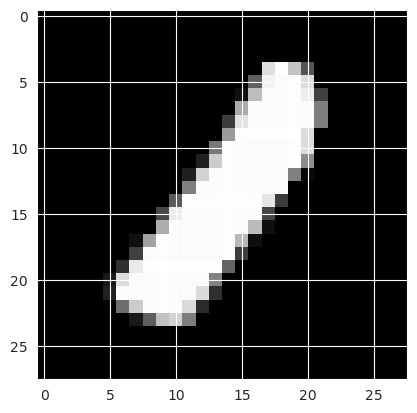

7 7


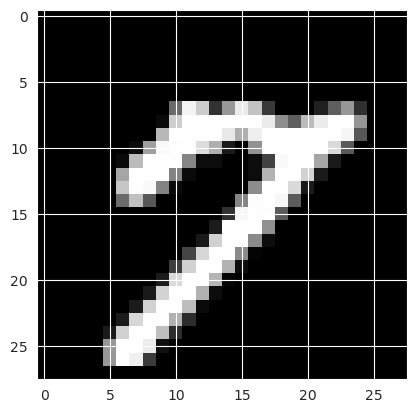

5 3


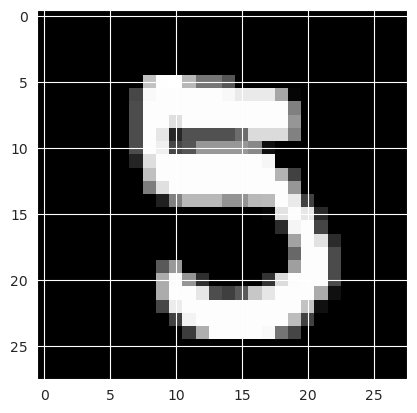

8 8


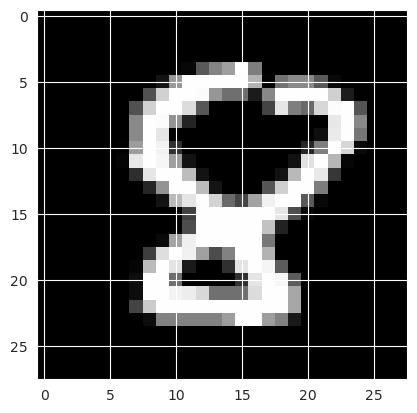

0 0


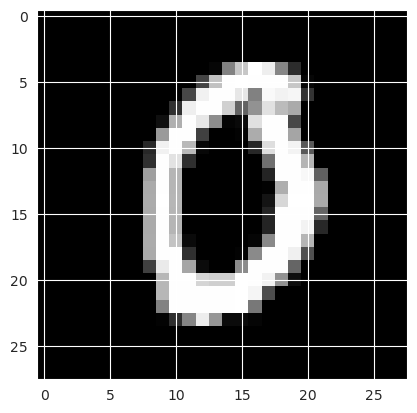

2 2


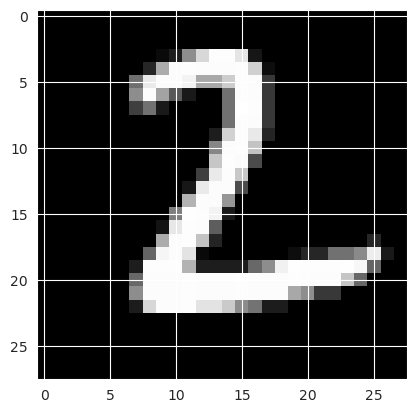

7 7


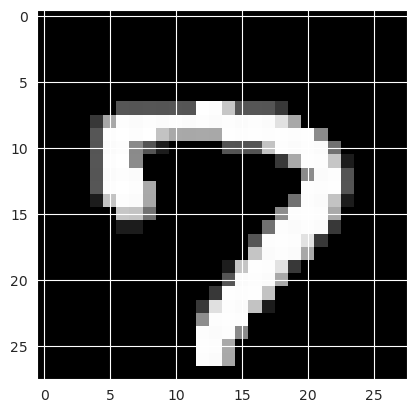

8 8


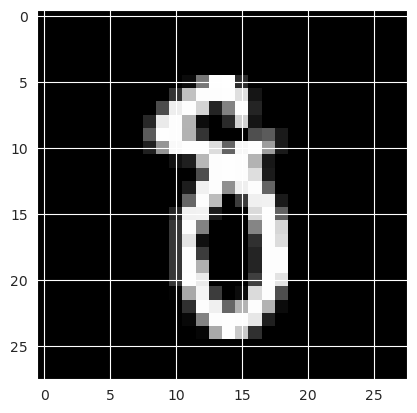

1 1


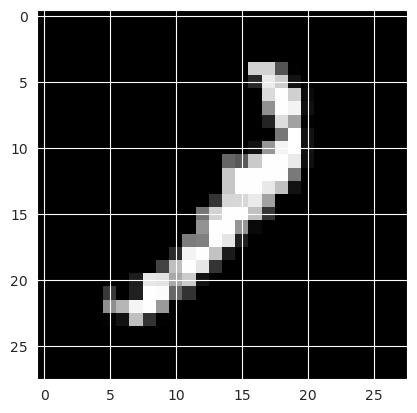

8 8


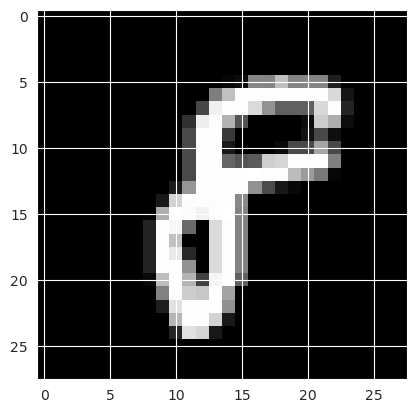

5 5


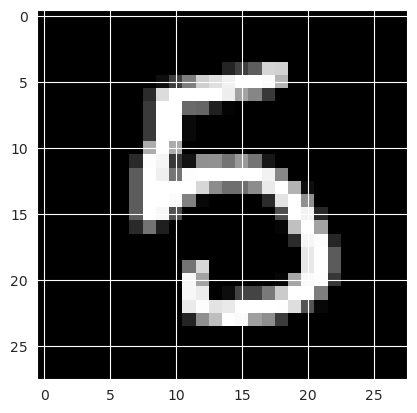

8 8


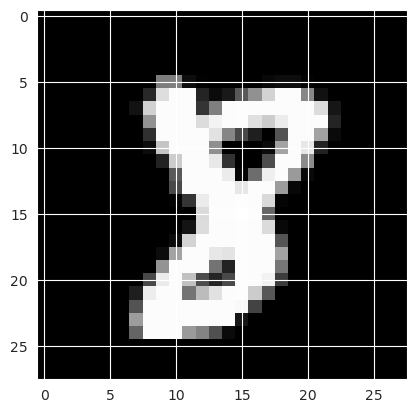

4 4


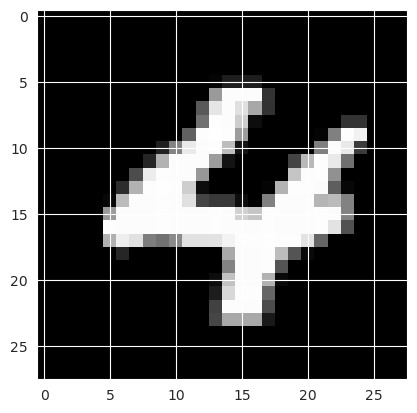

0 0


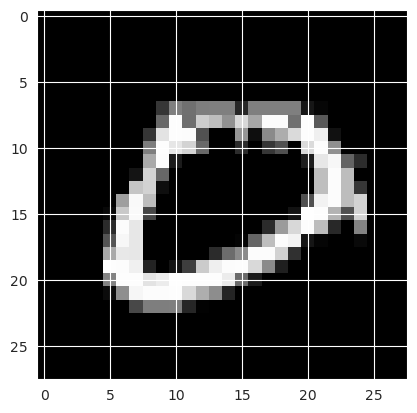

0 0


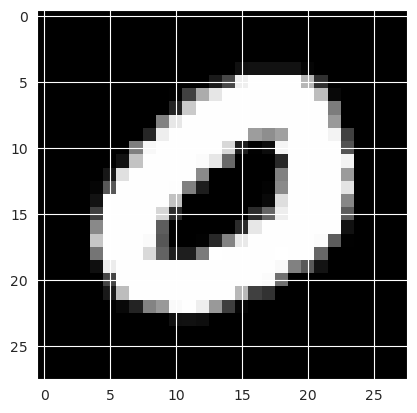

3 3


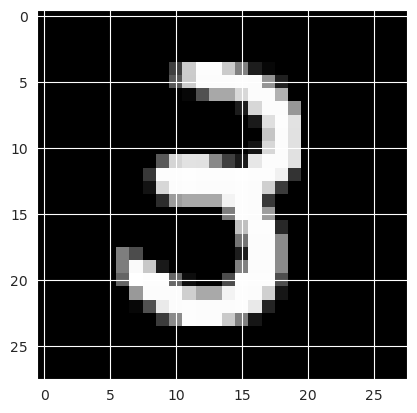

5 5


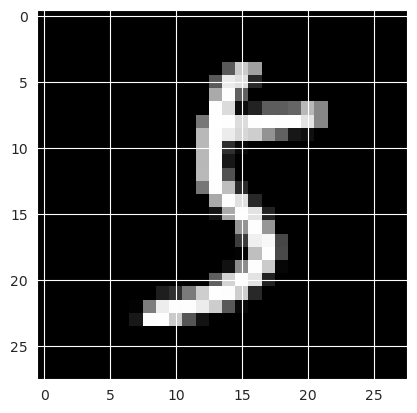

1 1


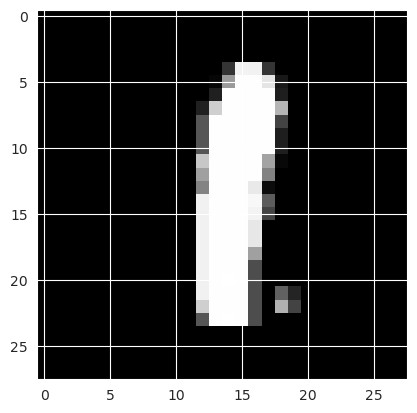

2 2


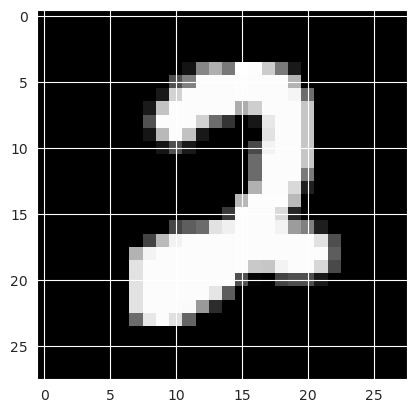

9 9


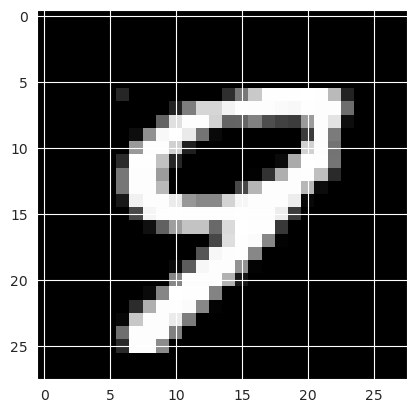

In [5]:
all = 0
correct = 0
for i, (inputs, labels) in enumerate(test_loader):
    predicted = model(inputs.reshape(-1, input_size))
    all += labels.size(0)
    for j, label in enumerate(labels):
        if label.item() == predicted[j].argmax().item():
            correct += 1

print(f'Accuracy: {correct / all}')
mlflow.log_param("test_accuracy", correct / all)
mlflow.end_run()

for i, (inputs, labels) in enumerate(test_loader):
    predicted = model(inputs.reshape(-1, input_size))
    for j, label in enumerate(labels):
        print(label.item(), predicted[j].argmax().item())
        plt.imshow(inputs[j][0], cmap='gray')
        plt.show()
        if j == 10:
            break
    if i == 5:
        break